In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from numpy import arange
import math
from scipy.optimize import curve_fit
import utm

In [2]:
gpswalkingf = pd.read_csv('walking_open-gps.csv')
gpsstaticf = pd.read_csv('stat_open_10_min-gps.csv')
gpswalkingo = pd.read_csv('walking_occ-gps.csv')
gpsstatico = pd.read_csv('stat_occ-gps.csv')

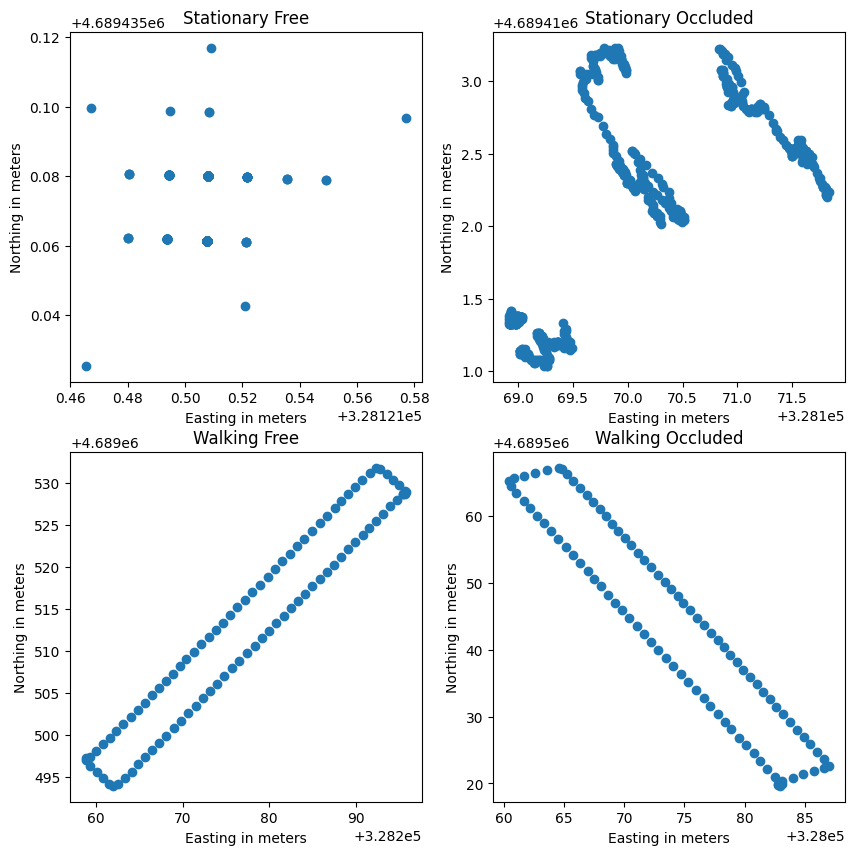

In [3]:
fig , axis = plt.subplots(2,2,figsize = (10,10))
axis[0,0].scatter(x=gpsstaticf[".UTM_easting"][1:], y=gpsstaticf[".UTM_northing"][1:])
axis[0,0].set_title("Stationary Free")
axis[0,0].set_xlabel("Easting in meters")
axis[0,0].set_ylabel("Northing in meters")

axis[0,1].scatter(x=gpsstatico[".UTM_easting"][1:], y=gpsstatico[".UTM_northing"][1:])
axis[0,1].set_title("Stationary Occluded")
axis[0,1].set_xlabel("Easting in meters")
axis[0,1].set_ylabel("Northing in meters")

axis[1,0].scatter(x=gpswalkingf[".UTM_easting"][1:], y=gpswalkingf[".UTM_northing"][1:])
axis[1,0].set_title("Walking Free")
axis[1,0].set_xlabel("Easting in meters")
axis[1,0].set_ylabel("Northing in meters")

axis[1,1].scatter(x=gpswalkingo[".UTM_easting"][1:], y=gpswalkingo[".UTM_northing"][1:])
axis[1,1].set_title("Walking Occluded")
axis[1,1].set_xlabel("Easting in meters")
axis[1,1].set_ylabel("Northing in meters")

plt.show()

In [12]:
stattime=[]
x = gpsstaticf["time"][0]
m0 = float(x.split(":")[1])
sec0 = float(x.split(":")[2])
for i in gpsstaticf["time"][1:]:
    x = i
    m =float(x.split(':')[1])
    sec = float(x.split(":")[2])
    t = (m - m0)*60 + sec-sec0
    stattime.append(t)

stattime1=[]
x = gpsstatico[".Header.stamp.secs"][0]
for i in gpsstatico[".Header.stamp.secs"][1:]:
    y = i
    t = y-x
    stattime1.append(t)
    
stattime2=[]
x = gpswalkingf["time"][0]
m0 = float(x.split(":")[1])
sec0 = float(x.split(":")[2])
for i in gpswalkingf["time"][1:]:
    x = i
    m =float(x.split(':')[1])
    sec = float(x.split(":")[2])
    t = (m - m0)*60 + sec-sec0
    stattime2.append(t)

stattime3=[]
x = gpswalkingo["time"][0]
m0 = float(x.split(":")[1])
sec0 = float(x.split(":")[2])
for i in gpswalkingo["time"][1:]:
    x = i
    m =float(x.split(':')[1])
    sec = float(x.split(":")[2])
    t = (m - m0)*60 + sec-sec0
    stattime3.append(t)

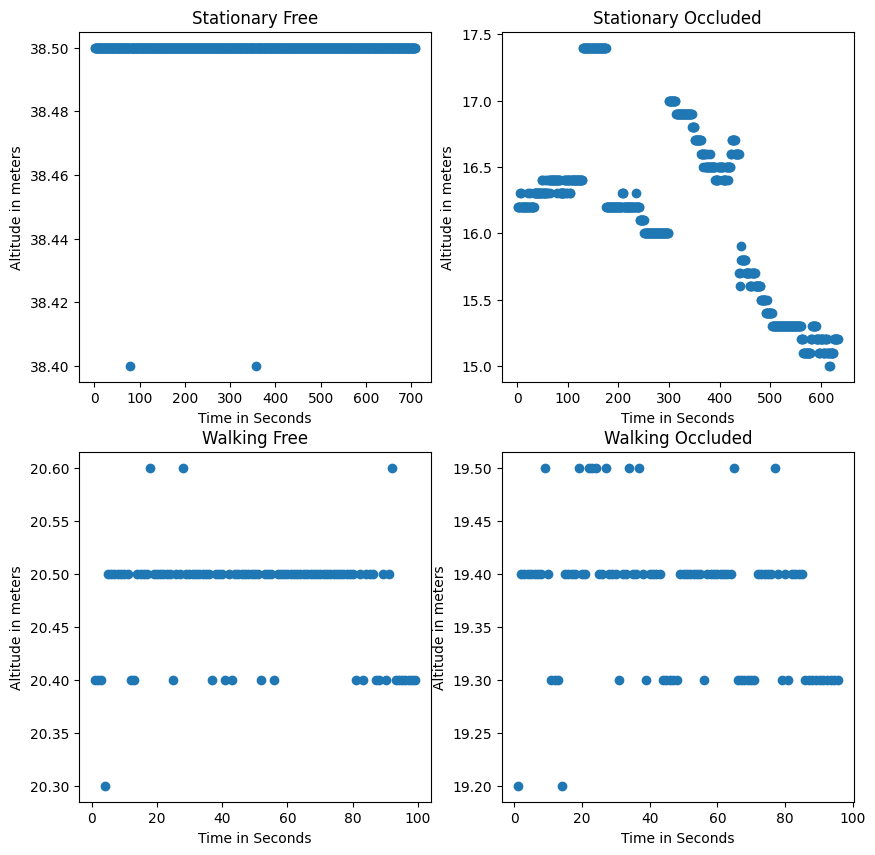

In [13]:
fig , axis = plt.subplots(2,2,figsize = (10,10))

axis[0,0].scatter(x=stattime, y=gpsstaticf[".Altitude"][1:])
axis[0,0].set_title("Stationary Free")
axis[0,0].set_xlabel("Time in Seconds")
axis[0,0].set_ylabel("Altitude in meters")

axis[0,1].scatter(x=stattime1, y=gpsstatico[".Altitude"][1:])
axis[0,1].set_title("Stationary Occluded")
axis[0,1].set_xlabel("Time in Seconds")
axis[0,1].set_ylabel("Altitude in meters")

axis[1,0].scatter(x=stattime2, y=gpswalkingf[".Altitude"][1:])
axis[1,0].set_title("Walking Free")
axis[1,0].set_xlabel("Time in Seconds")
axis[1,0].set_ylabel("Altitude in meters")

axis[1,1].scatter(x=stattime3, y=gpswalkingo[".Altitude"][1:])
axis[1,1].set_title("Walking Occluded")
axis[1,1].set_xlabel("Time in Seconds")
axis[1,1].set_ylabel("Altitude in meters")

plt.show()

RMSE is 1.84903930243698
Mean is 1.8490196436260162
Median is 1.8530682767901554
RMSE is 1.9665362721748307
Mean is 1.8539025054055998
Median is 1.8232989065251741


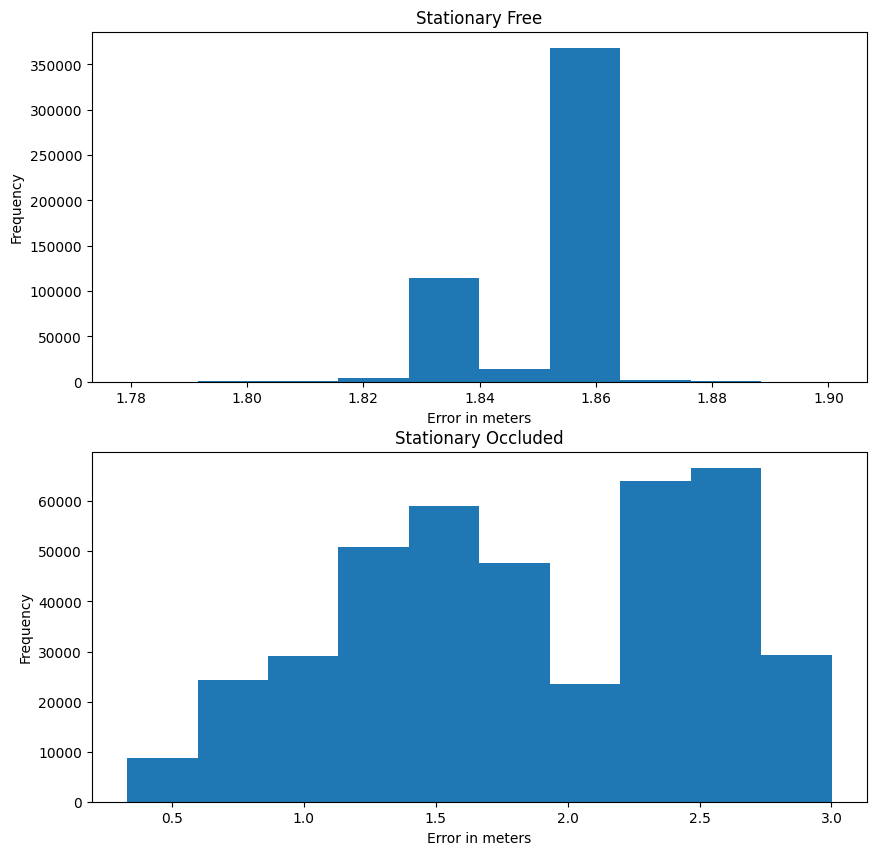

In [31]:
se = []
sm = []
true = utm.from_latlon(42.33821198352815, -71.08641989071687)
for lat in gpsstaticf[".UTM_northing"] :
    for lon in gpsstaticf[".UTM_easting"]:
        se.append(math.sqrt((lat-true[1])**2+ (lon-true[0])**2))
for i in se:
    sm.append(i**2)
RMSE = math.sqrt(sum(sm)/len(se))
print("RMSE is " + str(RMSE))
mean = sum(se)/len(se)
print("Mean is " + str(mean))
se.sort()
mid = len(se) // 2
res = (se[mid] + se[~mid]) / 2
print("Median is " + str(res))
se2 = []
sm2 = []
true = utm.from_latlon(42.33801329029123, -71.08582505429443)
for lat in gpsstatico[".UTM_northing"] :
    for lon in gpsstatico[".UTM_easting"]:
        se2.append(math.sqrt((lat-true[1])**2+ (lon-true[0])**2))
        
for i in se2:
    sm2.append(i**2)
RMSE1 = math.sqrt(sum(sm2)/len(se2))
print("RMSE is " + str(RMSE1))
mean = sum(se2)/len(se2)
print("Mean is " + str(mean))
se2.sort()
mid = len(se2) // 2
res = (se2[mid] + se2[~mid]) / 2
print("Median is " + str(res))

fig, ax = plt.subplots(2,figsize =(10, 10))
ax[0].hist(se)
ax[0].set_xlabel("Error in meters")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Stationary Free")
ax[1].hist(se2)
ax[1].set_xlabel("Error in meters")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Stationary Occluded")
# Show plot
plt.show()

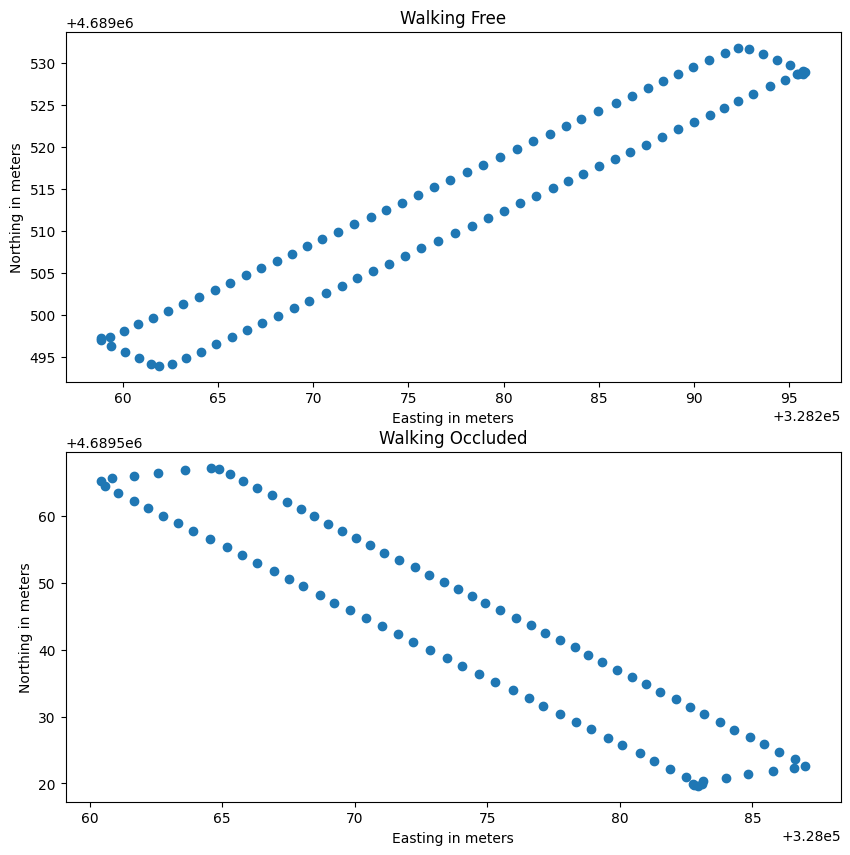

In [17]:
fig ,axis = plt.subplots(2,figsize = (10,10))
axis[0].scatter(x=gpswalkingf[".UTM_easting"][1:], y=gpswalkingf[".UTM_northing"][1:])
axis[0].set_title("Walking Free")
axis[0].set_xlabel("Easting in meters")
axis[0].set_ylabel("Northing in meters")

axis[1].scatter(x=gpswalkingo[".UTM_easting"][1:], y=gpswalkingo[".UTM_northing"][1:])
axis[1].set_title("Walking Occluded")
axis[1].set_xlabel("Easting in meters")
axis[1].set_ylabel("Northing in meters")

plt.show()

Text(0, 0.5, 'Altitude in meters')

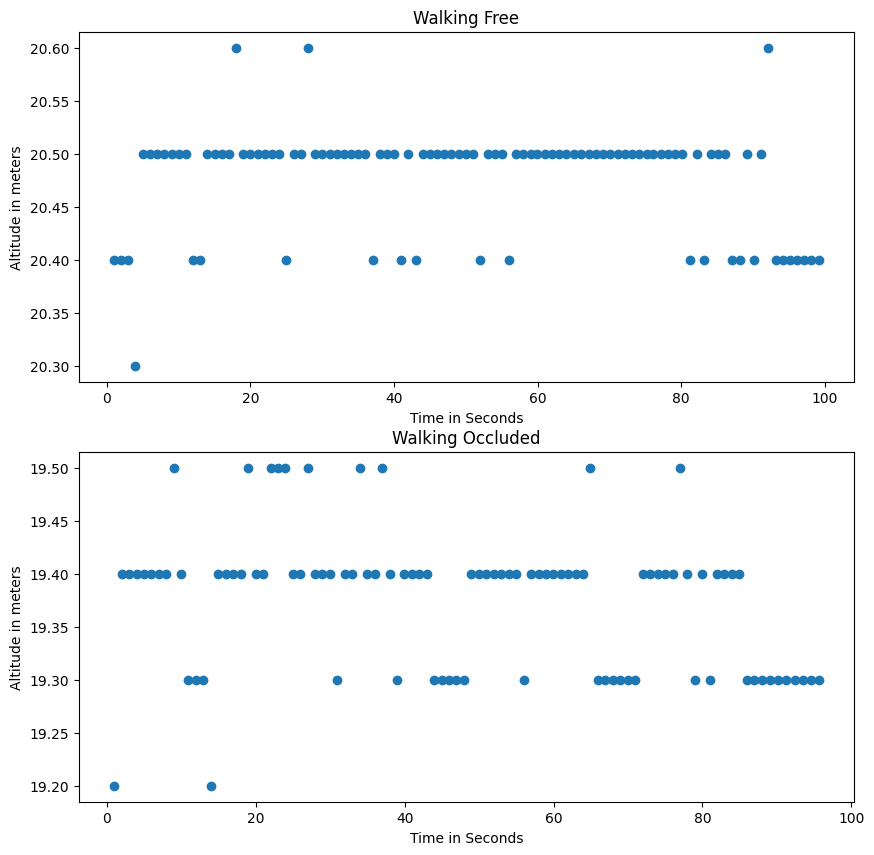

In [18]:
fig ,axis = plt.subplots(2,figsize = (10,10))
axis[0].scatter(x=stattime2, y=gpswalkingf[".Altitude"][1:])
axis[0].set_title("Walking Free")
axis[0].set_xlabel("Time in Seconds")
axis[0].set_ylabel("Altitude in meters")

axis[1].scatter(x=stattime3, y=gpswalkingo[".Altitude"][1:])
axis[1].set_title("Walking Occluded")
axis[1].set_xlabel("Time in Seconds")
axis[1].set_ylabel("Altitude in meters")

In [64]:
fixe = []
fixn=[]
fixrtke=[]
fixrtkn= []
fixrtkfe=[]
fixrtkfn=[]
gpsfix = dict( )
gpsrtkfix = dict( )
gpsrtkfloat = dict()
for i in range(0,len(gpsstatico[".fix_quality"])):
    if gpsstatico[".fix_quality"][i] == 2:
        fixe.append(gpsstatico[".UTM_easting"][i])
        fixn.append(gpsstatico[".UTM_northing"][i])
    if gpsstatico[".fix_quality"][i] == 4:
        fixrtke.append(gpsstatico[".UTM_easting"][i])
        fixrtkn.append(gpsstatico[".UTM_northing"][i])
    if gpsstatico[".fix_quality"][i] == 5:
        fixrtkfe.append(gpsstatico[".UTM_easting"][i])
        fixrtkfn.append(gpsstatico[".UTM_northing"][i])
gpsfix[".UTM_easting"] = fixe
gpsfix[".UTM_northing"] = fixn
gpsrtkfix[".UTM_easting"] = fixrtke
gpsrtkfix[".UTM_northing"] = fixrtkn
gpsrtkfloat[".UTM_easting"] = fixrtkfe
gpsrtkfloat[".UTM_northing"] = fixrtkfn

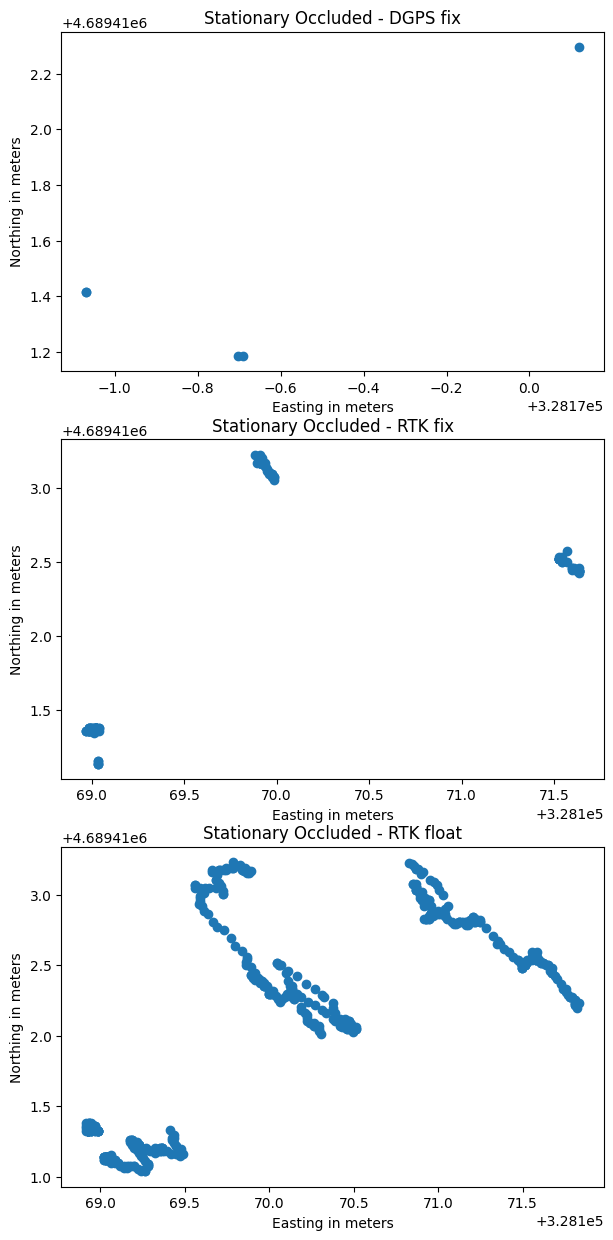

In [65]:
fig , axis = plt.subplots(3,figsize = (7,15))
axis[0].scatter(x=gpsfix[".UTM_easting"][1:], y=gpsfix[".UTM_northing"][1:])
axis[0].set_title("Stationary Occluded - DGPS fix")
axis[0].set_xlabel("Easting in meters")
axis[0].set_ylabel("Northing in meters")

axis[1].scatter(x=gpsrtkfix[".UTM_easting"][1:], y=gpsrtkfix[".UTM_northing"][1:])
axis[1].set_title("Stationary Occluded - RTK fix")
axis[1].set_xlabel("Easting in meters")
axis[1].set_ylabel("Northing in meters")

axis[2].scatter(x=gpsrtkfloat[".UTM_easting"][1:], y=gpsrtkfloat[".UTM_northing"][1:])
axis[2].set_title("Stationary Occluded - RTK float")
axis[2].set_xlabel("Easting in meters")
axis[2].set_ylabel("Northing in meters")

plt.show()

RMSE is 2.508698879418221
Mean is 2.4831427333387515
Median is 2.6744664175699473
RMSE is 2.017194334436641
Mean is 1.9132226210038996
Median is 1.8843734007348032
RMSE is 1.9491136829462967
Mean is 1.8351639638316268
Median is 1.7717382841053482


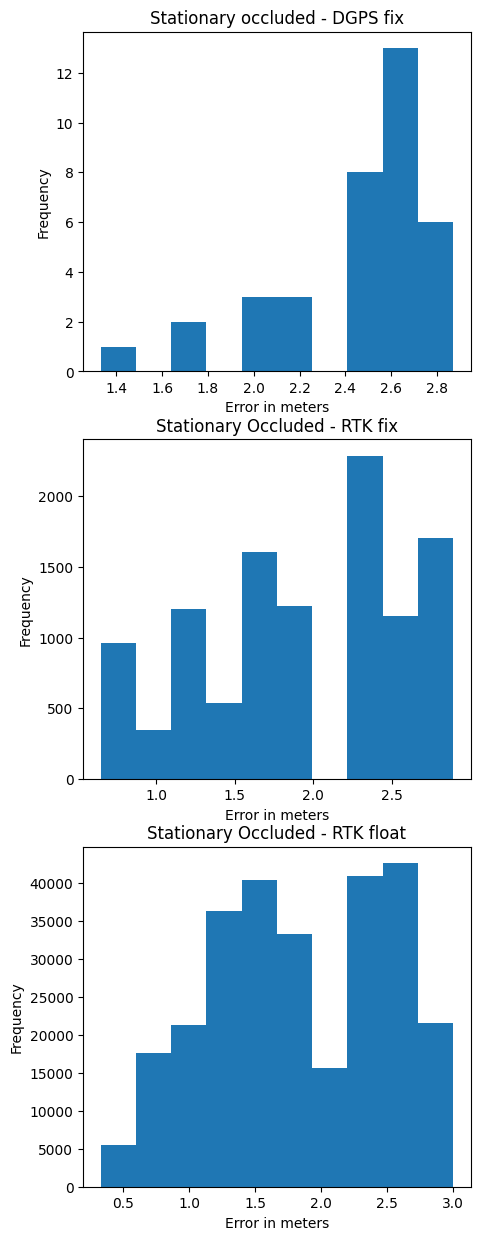

In [68]:
se = []
sm = []
true = utm.from_latlon(42.33801329029123, -71.08582505429443)
for lat in gpsfix[".UTM_northing"] :
    for lon in gpsfix[".UTM_easting"]:
        se.append(math.sqrt((lat-true[1])**2+ (lon-true[0])**2))
for i in se:
    sm.append(i**2)
RMSE = math.sqrt(sum(sm)/len(se))
print("RMSE is " + str(RMSE))
mean = sum(se)/len(se)
print("Mean is " + str(mean))
se.sort()
mid = len(se) // 2
res = (se[mid] + se[~mid]) / 2
print("Median is " + str(res))
se2 = []
sm2 = []
true = utm.from_latlon(42.33801329029123, -71.08582505429443)
for lat in gpsrtkfix[".UTM_northing"] :
    for lon in gpsrtkfix[".UTM_easting"]:
        se2.append(math.sqrt((lat-true[1])**2+ (lon-true[0])**2))
        
for i in se2:
    sm2.append(i**2)
RMSE1 = math.sqrt(sum(sm2)/len(se2))
print("RMSE is " + str(RMSE1))
mean = sum(se2)/len(se2)
print("Mean is " + str(mean))
se2.sort()
mid = len(se2) // 2
res = (se2[mid] + se2[~mid]) / 2
print("Median is " + str(res))
se3 = []
sm3 = []
true = utm.from_latlon(42.33801329029123, -71.08582505429443)
for lat in gpsrtkfloat[".UTM_northing"] :
    for lon in gpsrtkfloat[".UTM_easting"]:
        se3.append(math.sqrt((lat-true[1])**2+ (lon-true[0])**2))
        
for i in se3:
    sm3.append(i**2)
RMSE3 = math.sqrt(sum(sm3)/len(se3))
print("RMSE is " + str(RMSE3))
mean = sum(se3)/len(se3)
print("Mean is " + str(mean))
se3.sort()
mid = len(se3) // 2
res = (se3[mid] + se3[~mid]) / 2
print("Median is " + str(res))

fig, ax = plt.subplots(3,figsize =(5, 15))
ax[0].hist(se)
ax[0].set_xlabel("Error in meters")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Stationary occluded - DGPS fix")
ax[1].hist(se2)
ax[1].set_xlabel("Error in meters")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Stationary Occluded - RTK fix")
ax[2].hist(se3)
ax[2].set_xlabel("Error in meters")
ax[2].set_ylabel("Frequency")
ax[2].set_title("Stationary Occluded - RTK float")
# Show plot
plt.show()